#===========================================================
## Task 2: Predict Future Stock Prices (Short-Term)
## Developer: Nimerta Wadhwani
## Internship: AI/ML Engineering - DevelopersHub
#===========================================================

## Objective
Use real-time stock data from Yahoo Finance to predict the next day’s closing price using features like Open, High, Low, and Volume.

## Import Libraries

In [1]:
pip install yfinance

  Using cached yfinance-0.2.65-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached frozendict-2.4.6-cp39-cp39-win_amd64.whl.metadata (23 kB)
  Using cached peewee-3.18.2.tar.gz (949 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


## Download Stock Data

In [2]:
#Download Tesla stock data for the last 3 years
df = yf.download('TSLA', start='2022-01-01', end='2025-01-01')

#Show the first 5 rows
df.head()


C:\Users\AL-MALAK\AppData\Local\Temp\ipykernel_10908\622928893.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TSLA', start='2022-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400
2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300
2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800
2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600
2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700


## EDA (Exploratory Data Analysis)

Price   Ticker
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64


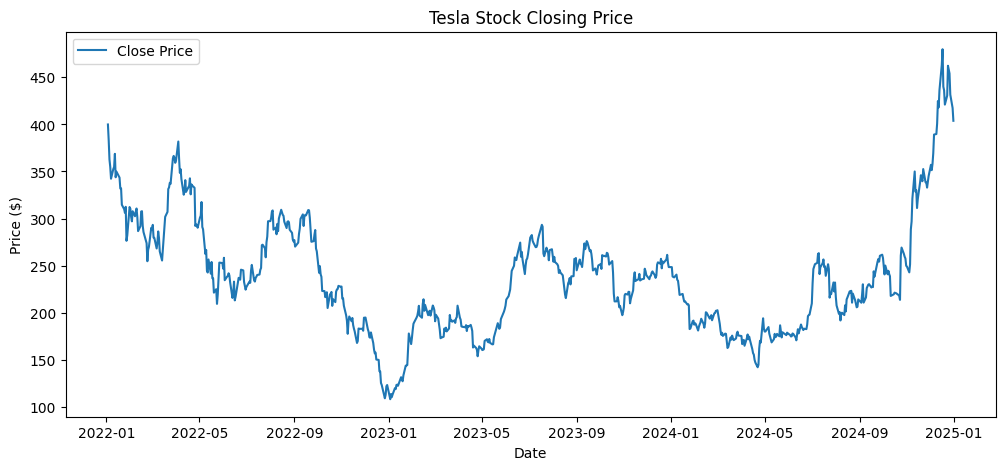

In [3]:
# Check for missing values
print(df.isnull().sum())

# Plot closing prices
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price')
plt.title("Tesla Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


## Feature Engineering

In [4]:
#Shift the 'Close' column up to act as the label for the previous day
df['Target'] = df['Close'].shift(-1)

#Drop last row (since its target will be NaN)
df = df.dropna()

#Select features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Target']


## Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Regression Model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict and Evaluate

In [7]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 7.30944999213233
Mean Squared Error (MSE): 108.57175088605793


## Visualize Actual vs Predicted

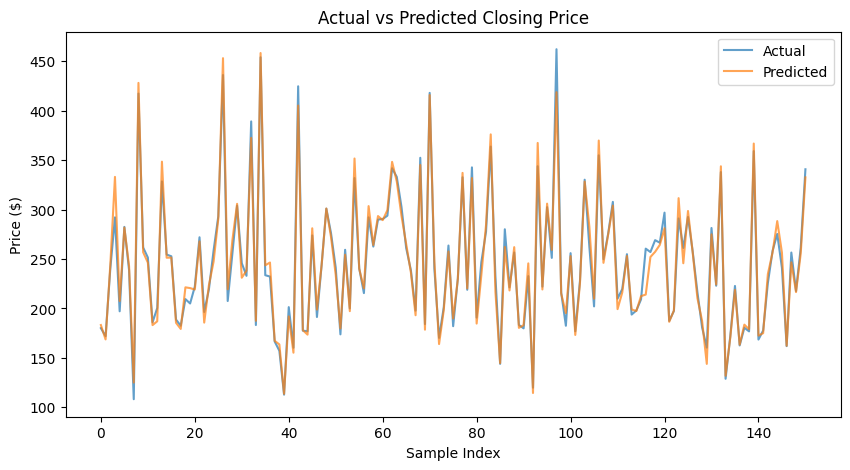

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.title("Actual vs Predicted Closing Price")
plt.xlabel("Sample Index")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


## Conclusion
- Linear regression gave reasonable short-term predictions for Tesla’s stock closing price.
- MAE and MSE suggest the model is accurate within a few dollars on average.
- Feature importance is not directly visible in Linear Regression but Open, High, and Low prices are strongly correlated with Close.

✅ This simple model can be improved using more advanced models like Random Forest or LSTM (future enhancement).